# ***Let's Begin !***

### Import Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

import tensorflow as tf

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_csv('/content/drive/My Drive/NSE-TATAGLOBAL.csv')

### Dataset First View

In [4]:
df1.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [5]:
df1.tail(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2025,2010-08-03,118.3,119.95,117.90,118.65,118.30,611234,726.78
2026,2010-08-02,117.3,118.50,116.60,118.10,117.30,663593,779.85
2027,2010-07-30,116.5,118.00,114.60,115.85,116.05,2656191,3112.68
2028,2010-07-29,112.5,121.70,112.50,117.50,116.60,2359134,2791.03
2029,2010-07-28,118.0,120.50,117.20,118.15,118.25,835593,994.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


### Dataset Information

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [7]:
df1.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [8]:
df1.shape

(2035, 8)

#### Missing Values/Null Values

In [9]:
df1.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

#### Duplicate Values

In [10]:
df1[df1.duplicated()]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)


In [30]:
duplicate_value_count = len(df1[df1.duplicated()])

print('Number of duplicates value present is:',duplicate_value_count)

Number of duplicates value present is: 0


1.Dataset contains 2035 no.of.rows and 8 no.of.columns

2.No duplicate value present in the dataset.

3.No duplicate value present in the dataset.



####Explore Target Variables

<ipython-input-21-5bf096394e18>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Close'],color="g")


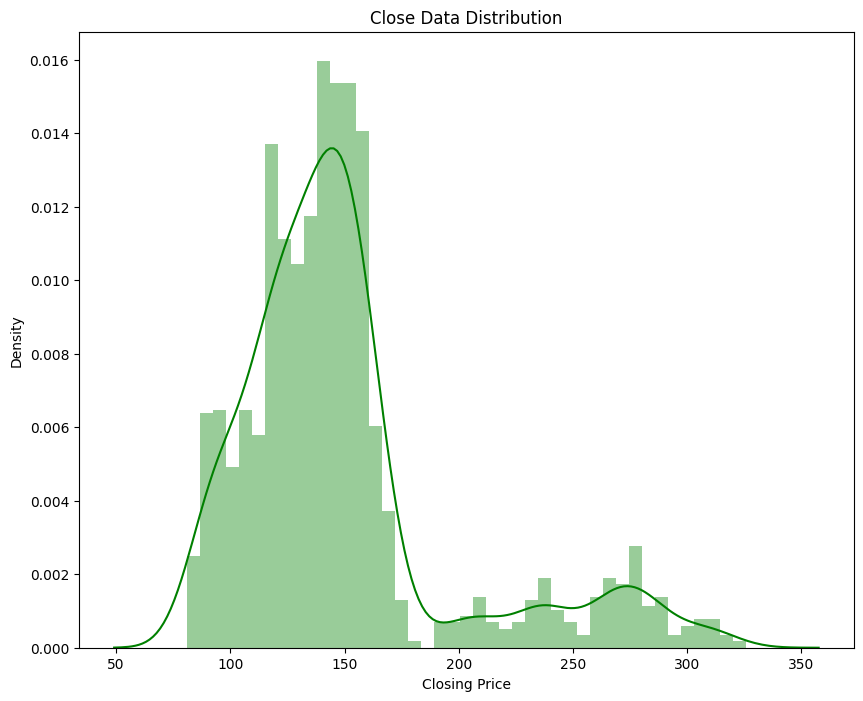

In [21]:
plt.figure(figsize=(10,8))
sns.distplot(df1['Close'],color="g")
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')
plt.show()

<Axes: >

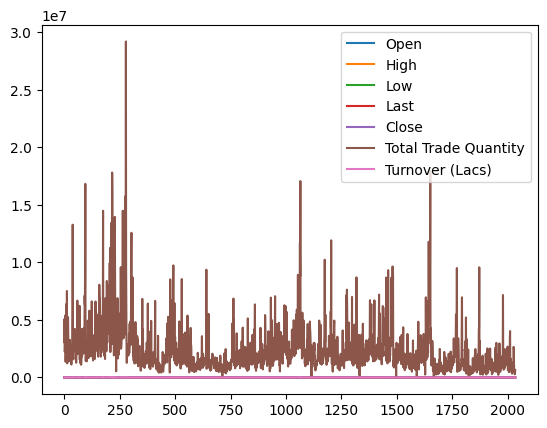

In [22]:
df1.plot()

In [23]:
data_features = df1[['Open','High','Low','Last','Close','Total Trade Quantity','Turnover (Lacs)']]

In [ ]:
for cols in data_features:
  fig = plt.figure(figsize=(8,6))
  ax = fig.gca()
  feature = df1[cols]
  label = df1['Close']
  correlation = feature.corr(label)
  plt.scatter(x =feature,y=label)
  plt.xlabel(cols)
  plt.ylabel('Close')
  ax.set_title('Close vs' + ' ' + cols + '-correlation:'+ str(correlation))
  z = np.polyfit(df1[cols],df1['Close'],1)
  y_hat = np.poly1d(z)(df1[cols])
  plt.plot(df1[cols],y_hat,'r--',lw=1)

plt.show()

In [ ]:
fig = plt.figure(figsize=(8,6))
correlation = df1.corr()
sns.heatmap(abs(correlation),annot=True,cmap='coolwarm')

In [11]:
training_set = df1.iloc[:,1:2].values

In [12]:
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [14]:
len(training_set)

2035

####Scaling the Datasets

In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
training_set_scaled =scaler.fit_transform(training_set)

In [17]:
x_train = []
y_train  = []
for i in range(60,2035):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

In [31]:
data_test = pd.read_csv('/content/drive/My Drive/NSE-TATAGLOBAL.csv')

In [35]:
real_stock_price = data_test.iloc[:, 1:2].values

In [32]:
data_total = pd.concat((df1['Open'], data_test['Open']), axis = 0)
inputs = data_total[len(data_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

In [33]:
x_test = []
for i in range(60, 76):
    x_test.append(inputs[i - 60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 9s 9s/step


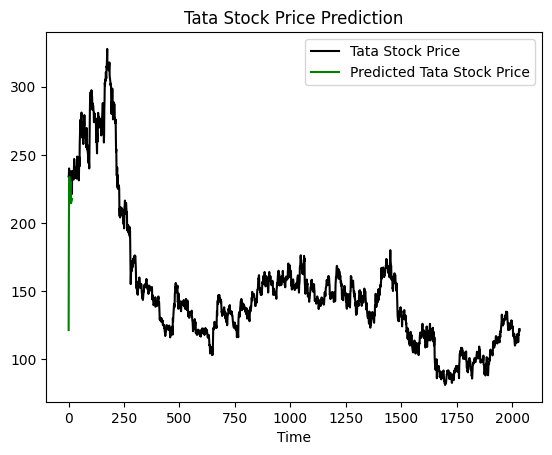

In [36]:
plt.plot(real_stock_price, color = 'black', label = 'Tata Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Tata Stock Price')
plt.title('Tata Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel = ('Tata Stock Price')
plt.legend()
plt.show()